In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Calculating heat diffusion in underground rocks



In [13]:
#defining constants

diffusion_rate = 1e-6
K = diffusion_rate
start_temp = 15
Nz = 500
dz = 1/4

Nt = 5000
dt = (365*24*60*60)/Nt 


u = start_temp * np.ones((Nz+1,Nt+1))

In [14]:
time = np.arange(0,12, 12/(Nt+1))
time.shape


(5001,)

In [15]:
#surface condition
u[0,:] = 15 - 10*np.sin(2*np.pi*time/12)

In [38]:
max_iter = 100
epsilon = 1e-6

err = []

for itera in range(max_iter):
    
    
    u_old = u
    u[:,0] = u_old[:,-1]
    
    for i in range(1,Nt+1):
        depth = (u[0:-1-2,i-1] - 2* u[1:-1-1, i-1] + u[2:-1, i-1])/ (dz**2)
        time_1d = K*depth
        
        u[1:-1-1,i] = time_1d * dt + u[1:-1-1,i-1]
        u[-1,i] = u[-1-1, i] #condition a la limite du fond
        
    
    err.append(np.max(abs(u - u_old)) )
    
    if err[-1] < epsilon:
        print(itera)
        break
    
    


[0.0]
0


In [29]:
u.shape

(501, 5001)

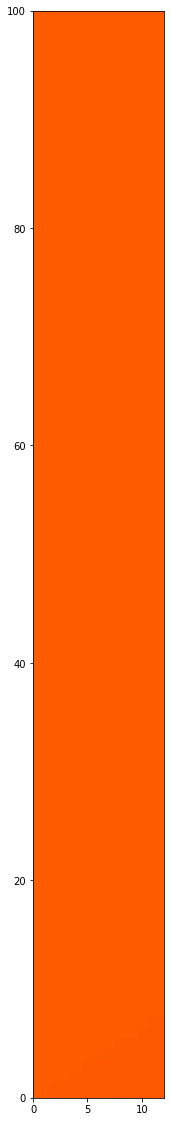

In [37]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

plt.imshow(u,cmap='hot')

/home/antoine/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


AxesSubplot(0.125,0.125;0.775x0.755)


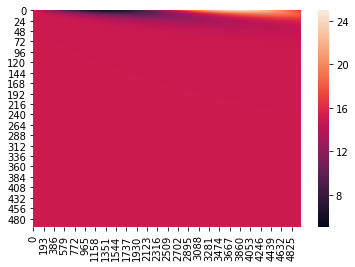

In [28]:
xmin = 0
xmax = 12

ymin = 0
ymax = 100

plt.axis([xmin, xmax, ymin, ymax])

print(plt.axes())
sns.heatmap(u)